In [1]:
from qiskit import*

In [24]:
def prepareAnsatz(parameters): 
    """
    Had to hard code the UCCSD ansatz at dist 0.5
    """
    circs = []
    strings = []
    string_1 = """OPENQASM 2.0;
    include "qelib1.inc";
    qreg q[2];
    u3(pi,0,pi) q[0];
    u3(pi/2,-pi/2,pi/2) q[0];"""
    string_2 = """OPENQASM 2.0;
    include "qelib1.inc";
    qreg q[2];
    u3(-pi/2,-pi/2,pi/2) q[0];
    u3(pi/2,-pi/2,pi/2) q[0];
    u3(pi/2,-pi/2,pi/2) q[1];"""
    string_3 = """OPENQASM 2.0;
    include "qelib1.inc";
    qreg q[2];
    u3(-pi/2,-pi/2,pi/2) q[1];
    u3(pi/2,0,pi) q[1];
    cx q[0],q[1];"""
    string_4 = """OPENQASM 2.0;
    include "qelib1.inc";
    qreg q[2];
    cx q[0],q[1];
    u3(-pi/2,-pi/2,pi/2) q[0];
    u3(pi/2,0,pi) q[0];
    u3(pi/2,0,pi) q[1];
    u3(pi/2,-pi/2,pi/2) q[1];
    cx q[0],q[1];"""
    string_5 = """OPENQASM 2.0;
    include "qelib1.inc";
    qreg q[2];
    cx q[0],q[1];
    u3(pi/2,0,pi) q[0];
    u3(-pi/2,-pi/2,pi/2) q[1];"""
    strings.append(string_1)
    strings.append(string_2)
    strings.append(string_3)
    strings.append(string_4)
    strings.append(string_5)
    #Making the circuits now 
    for string in strings: 
    circ = QuantumCircuit().from_qasm_str(string)
    circs.append(circ)
    #Twirling + CNOTing the Circuits Now
    for circ in circs: 
        circ = addCXerror(circ, 3)
        circ = create_Paulitwirled_circuit(circ)
    #Creating the parameterized gates 
    from qiskit.circuit import Parameter
    p_0 = Parameter(str(parameters[0]))
    p_1 = Parameter(str(parameters[1]))
    p_2 = Parameter(str(parameters[2]))
    circ_gates = []
    circy_1 = QuantumCircuit(1)
    circy_1.u3(0,0,-2*p_0, 0)
    circ_gates.append(circy_1)
    circy_2 = QuantumCircuit(1)
    circy_2.u3(0,0,2*p_1, 0)
    circ_gates.append(circy_2)
    circy_3 = QuantumCircuit(1)
    circy_3.u3(0,0,-1*p_2, 0)
    circ_gates.append(circy_3)
    circy_4 = QuantumCircuit(1)
    circy_4.u3(0,0,1*p_2, 0)
    circ_gates.append(circy_4)
    #adding in all circuits 
    circuit = circs[0]
    circuit.append(circ_gates[0], [0])
    circuit.append(circs[1], [0,1])
    circuit.append(circ_gates[1], [1])
    circuit.append(circs[2], [0,1])
    circuit.append(circ_gates[2], [1])
    circuit.append(circs[3], [0,1])
    circuit.append(circ_gates[3], [1])
    circuit.append(circs[4], [0,1])
    return circuit



NameError: name 'create_Paulitwirled_circuit' is not defined

In [20]:

u3(0,0,-2.0*θ[0]) q[0];

u3(0,0,2.0*θ[1]) q[1];

u3(0,0,-1.0*θ[2]) q[1];

u3(0,0,1.0*θ[2]) q[1];


In [21]:
string_3 = """OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
u3(-pi/2,-pi/2,pi/2) q[1];
u3(pi/2,0,pi) q[1];
cx q[0],q[1];"""

In [22]:
string_4 = """OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
cx q[0],q[1];
u3(-pi/2,-pi/2,pi/2) q[0];
u3(pi/2,0,pi) q[0];
u3(pi/2,0,pi) q[1];
u3(pi/2,-pi/2,pi/2) q[1];
cx q[0],q[1];"""

In [23]:
string_5 = """OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
cx q[0],q[1];
u3(pi/2,0,pi) q[0];
u3(-pi/2,-pi/2,pi/2) q[1];"""

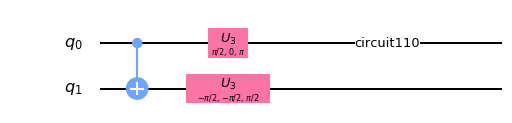

In [33]:
circ = QuantumCircuit().from_qasm_str(string_5)
circy = QuantumCircuit(1)
circy.x(0)
gate = circy.to_gate()
circ.append(circy, [0])
circ.draw(output = 'mpl')

In [7]:
string ="""u3(0,0,-2.0*θ[0]) q[0];""" 

import re
re.split('(*,)', string)

error: nothing to repeat at position 1